In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [6]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

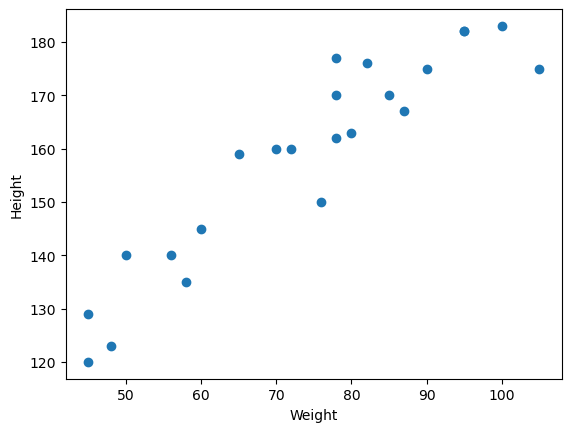

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [10]:
## divide our dataset into independent and dependent features
X=df[['Weight']] ## assuming independent feature
y=df['Height'] ##assuming dependent feature

In [12]:
## Train test split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [16]:
X.shape

(23, 1)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [20]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_train.head()


,Weight
12,105
1,58
13,100
5,78
2,48


In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

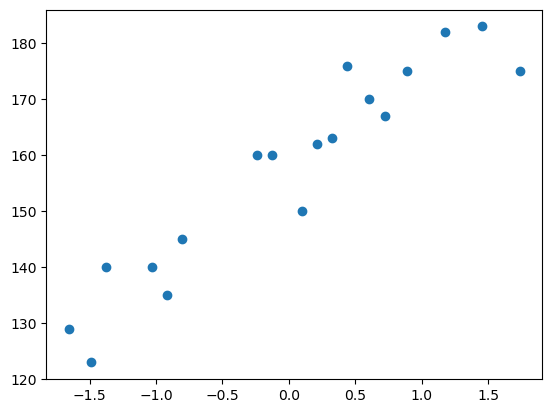

In [26]:
plt.scatter(X_train,y_train)

In [28]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [30]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Intercept:",regressor.intercept_)

Intercept: 157.5


In [32]:
print("The slope or coefficient of weight is ",regressor.coef_)

The slope or coefficient of weight is  [17.03440872]


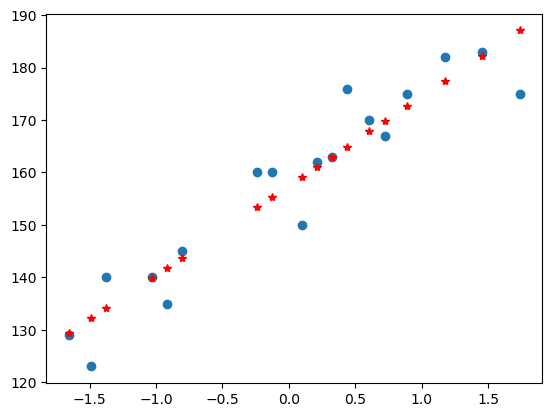

In [40]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r*')

In [42]:
# predicting 
y_pred_test=regressor.predict(X_test)
y_pred_test,y_test


(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

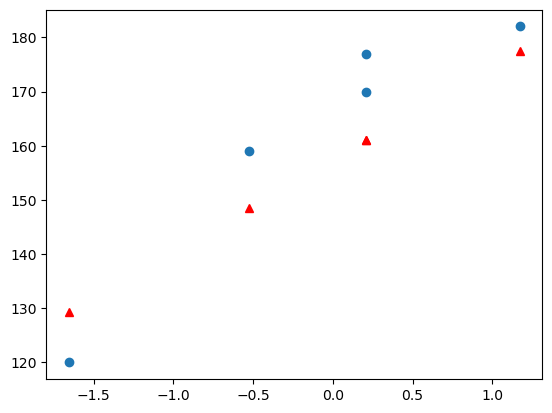

In [44]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r^')

In [48]:
# nowdoing performace metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


109.77592599051664
9.822657814519232
10.477400726827081


In [52]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


In [54]:
## new data point weight is 110

scaled_weight=scaler.transform([[110]])
scaled_weight
scaled_weight[0]
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [191.90213971]


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
